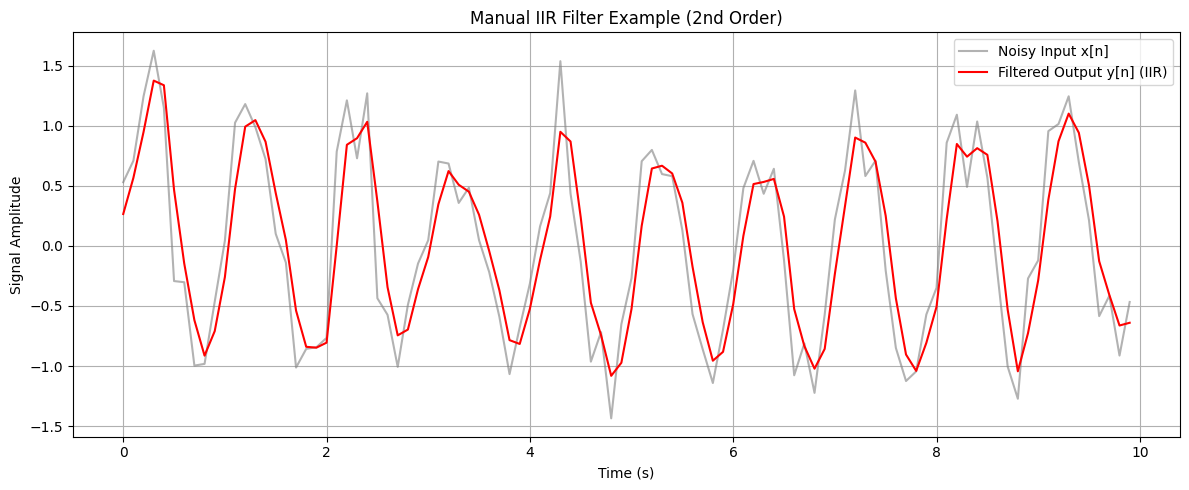

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate a simple noisy signal (e.g., a heartbeat-like wave + noise)
np.random.seed(0)
fs = 10  # Sampling rate (10 Hz for simplicity)
t = np.arange(0, 10, 1/fs)  # 10 seconds of signal
x = np.sin(2 * np.pi * 1 * t) + 0.3 * np.random.randn(len(t))  # Clean + noise

# IIR Filter coefficients (2nd order)
# Example: y[n] = 0.5*x[n] + 0.3*x[n-1] - 0.2*y[n-1]
b = [0.5, 0.3]  # feedforward coefficients
a = [1.0, -0.2]  # feedback coefficients (note: a[0] always = 1)

# Initialize output array
y = np.zeros_like(x)

# Manually apply IIR filter equation
for n in range(len(x)):
    # Use zero for out-of-bound indices
    x_n = x[n]
    x_n1 = x[n-1] if n-1 >= 0 else 0
    y_n1 = y[n-1] if n-1 >= 0 else 0
    y[n] = b[0]*x_n + b[1]*x_n1 - a[1]*y_n1

# Plot input vs filtered output
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Noisy Input x[n]', color='gray', alpha=0.6)
plt.plot(t, y, label='Filtered Output y[n] (IIR)', color='red')
plt.title('Manual IIR Filter Example (2nd Order)')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()